# Neural mass model: To describe the behaviour of a large group of neurons

In [6]:
# Packages

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

$\frac{dR(t)}{dt}=\frac{-R(t)+f[R(t)w_{R}-I(t)w_{I}+I_{\text{ext}}]}{\tau_{R}}, \frac{dI(t)}{dt}=\frac{-I(t)+g(w_{R})}{\tau_{I}}$

In [8]:
# Neural mass equations

def neural_mass_model(y, t, wR, wI, I_ext, tau_R, tau_I):
    R, I = y
    f = lambda x: 1 / (1 + np.exp(-x))  # sigmoid activation function
    g = lambda x: np.tanh(x)  # alternative activation function
    dR_dt = (-R + f(wR * R - wI * I + I_ext)) / tau_R
    dI_dt = (-I + g(wR * R)) / tau_I
    return [dR_dt, dI_dt]

In [10]:
# Simulation parameters

T = 100  # simulation time in ms
dt = 0.1  # time step in ms
t = np.arange(0, T + dt, dt)  # time vector
N = len(t)  # number of time steps

In [11]:
# Model parameters

wR = 2.5  # synaptic weight of excitatory input
wI = 5.0  # synaptic weight of inhibitory input
I_ext = 0.5  # external input
tau_R = 10.0  # time constant of excitatory population
tau_I = 20.0  # time constant of inhibitory population
y0 = [0, 0]  # initial conditions

In [12]:
# Solving the equations

sol = odeint(neural_mass_model, y0, t, args=(wR, wI, I_ext, tau_R, tau_I))

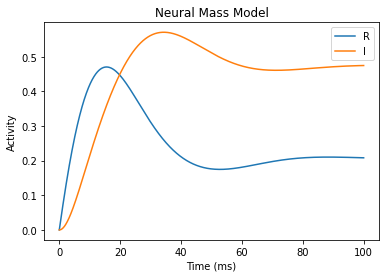

In [13]:
# Plotting the solution

fig, ax = plt.subplots()
ax.plot(t, sol[:, 0], label='R')  # plot the excitatory activity
ax.plot(t, sol[:, 1], label='I')  # plot the inhibitory activity
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Activity')
ax.set_title('Neural Mass Model')
ax.legend()
plt.show()